In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading dataset into Dataframe
haberman = pd.read_csv("haberman.csv")

In [3]:
# Shape of the data i.e. data-points and features
print (haberman.shape)

(305, 4)


In [4]:
# Column Information
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [5]:
# Since no column information is mentioned in the dataset. 
# Adding column headers
haberman.columns = ["Age", "Year", "Axillary nodes", "Survival status"]
print(haberman.columns)

Index(['Age', 'Year', 'Axillary nodes', 'Survival status'], dtype='object')


In [6]:
# Number of classes
print("Number of classes : ", haberman["Survival status"].nunique())

Number of classes :  2


In [7]:
# Number of data-points per class
print("Number of data-points per class :")
print(haberman["Survival status"].value_counts())

Number of data-points per class :
1    224
2     81
Name: Survival status, dtype: int64



-  Class 1 contains 224 datapoints i.e. 73.44%
-  Class 2 contains 81 data points i.e. 26.55%

The dataset is **imbalanced**.

# Univariate Analysis

## Histogram, PDF

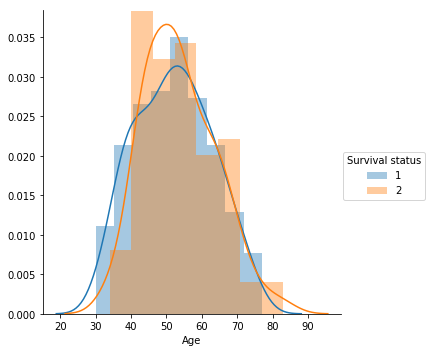

In [8]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()

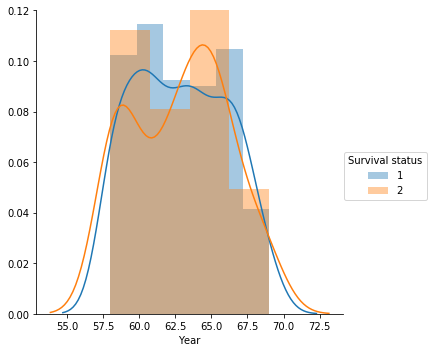

In [9]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Year") \
   .add_legend()

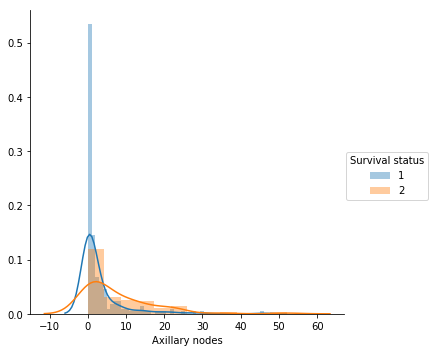

In [10]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Axillary nodes") \
   .add_legend()

### Observation

1. It can be seen from PDFs that **Age** and **Year** do not give useful insights as there is lot of overlapping.
2. **Axillary nodes** is an useful feature that can be used for knowing the survival status.
3. **Most of the Patients who survived for more than 5 years had 0 Axillary nodes.**

## CDF

In [11]:
living = haberman.loc[haberman["Survival status"]==1]
dead = haberman.loc[haberman["Survival status"]==2]

[0.66517857 0.125      0.04464286 0.02678571 0.02232143 0.03125
 0.00892857 0.00892857 0.00446429 0.01785714 0.00446429 0.00446429
 0.00446429 0.00446429 0.00892857 0.         0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00446429]


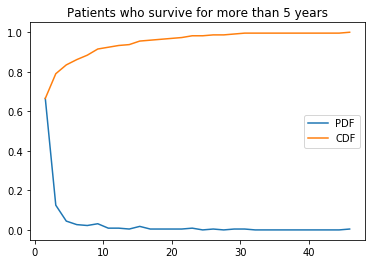

In [12]:
#PDF and CDF of pateients who survived for more than 5 years
counts, bin_edges = np.histogram(living['Axillary nodes'], bins=30, density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF','CDF'])
plt.title('Patients who survive for more than 5 years')
plt.show()

### Observation

- 80% of patients who survived for more than 5 years had less than 5 *Axillary nodes*. 
- So, lesser the axillary nodes greater the chance of survival.

[0.33333333 0.14814815 0.08641975 0.03703704 0.04938272 0.0617284
 0.04938272 0.04938272 0.03703704 0.01234568 0.02469136 0.01234568
 0.02469136 0.04938272 0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.         0.01234568]


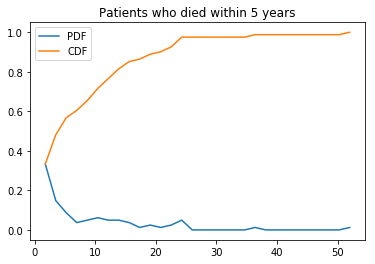

In [13]:
#PDF and CDF for patients who died within 5 years
counts, bin_edges = np.histogram(dead['Axillary nodes'], bins=30, density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF','CDF'])
plt.title('Patients who died within 5 years')
plt.show()

### Observation

- 80% of patients who died within 5 years had 15 axillary nodes.
- More the no. of Axillary nodes, lesser the chance of survival for 5 years.

## Box Plot with Whiskers

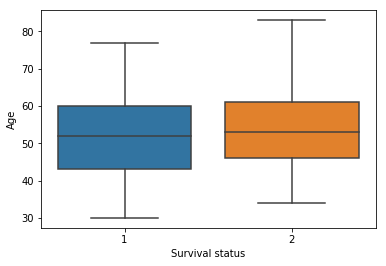

In [14]:
# Age Box Plot
sns.boxplot(x="Survival status", y="Age", data=haberman)
plt.show()

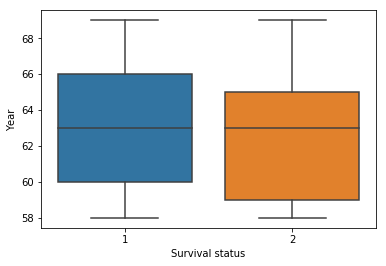

In [15]:
# Year Box Plot
sns.boxplot(x="Survival status", y="Year", data=haberman)
plt.show()

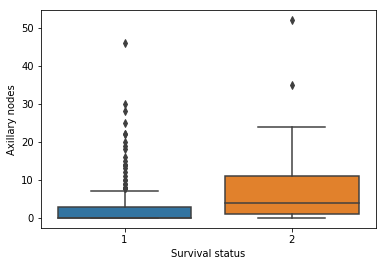

In [16]:
# Axillary Nodes Box Plot
sns.boxplot(x="Survival status", y="Axillary nodes", data=haberman)
plt.show()

In [17]:
print("Percentiles    :   0  25 50 75 ")
print("Living         : ",np.percentile(living["Axillary nodes"], np.arange(0,100,25)))
print("Dead           : ",np.percentile(dead["Axillary nodes"], np.arange(0,100,25)))

Percentiles    :   0  25 50 75 
Living         :  [0. 0. 0. 3.]
Dead           :  [ 0.  1.  4. 11.]


### Observations

1. **Age** and **Year** have almost same boxplot. IQR and 50th percentile is also almost same. So, these features independently cannot be used for distinguing survival status class 1 and class 2.
2. In **Axillary nodes** boxplot, 50 percentile patients of class 1 have 0 axillary nodes. 

## Violin Plot

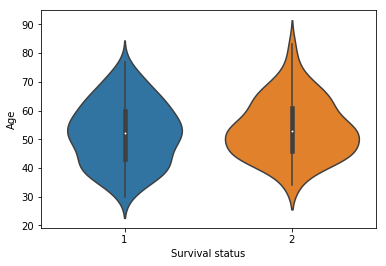

In [18]:
#Age Violin Plot
sns.violinplot(x="Survival status", y="Age", data=haberman, size=10)
plt.show()

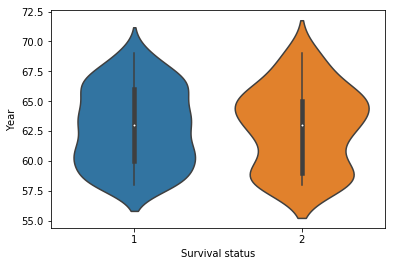

In [19]:
#Year Violin Plot
sns.violinplot(x="Survival status", y="Year", data=haberman, size=10)
plt.show()

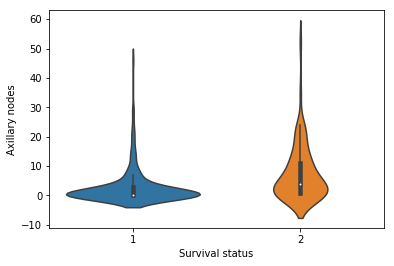

In [20]:
#Axillary nodes Violin Plot
sns.violinplot(x="Survival status", y="Axillary nodes", data=haberman, size=10)
plt.show()

# Bi-variate analysis

## Scatter plot

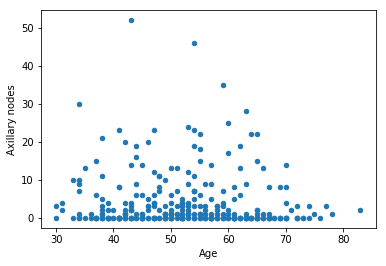

In [21]:
haberman.plot(kind='scatter', x='Age', y='Axillary nodes')
plt.show()

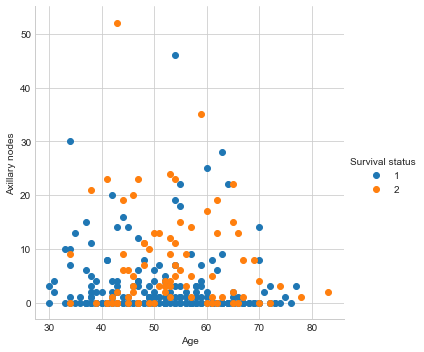

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(plt.scatter, "Age", "Axillary nodes") \
   .add_legend()

### Observation

1. Most of the patients have 0 axillary nodes.

## Pair Plot

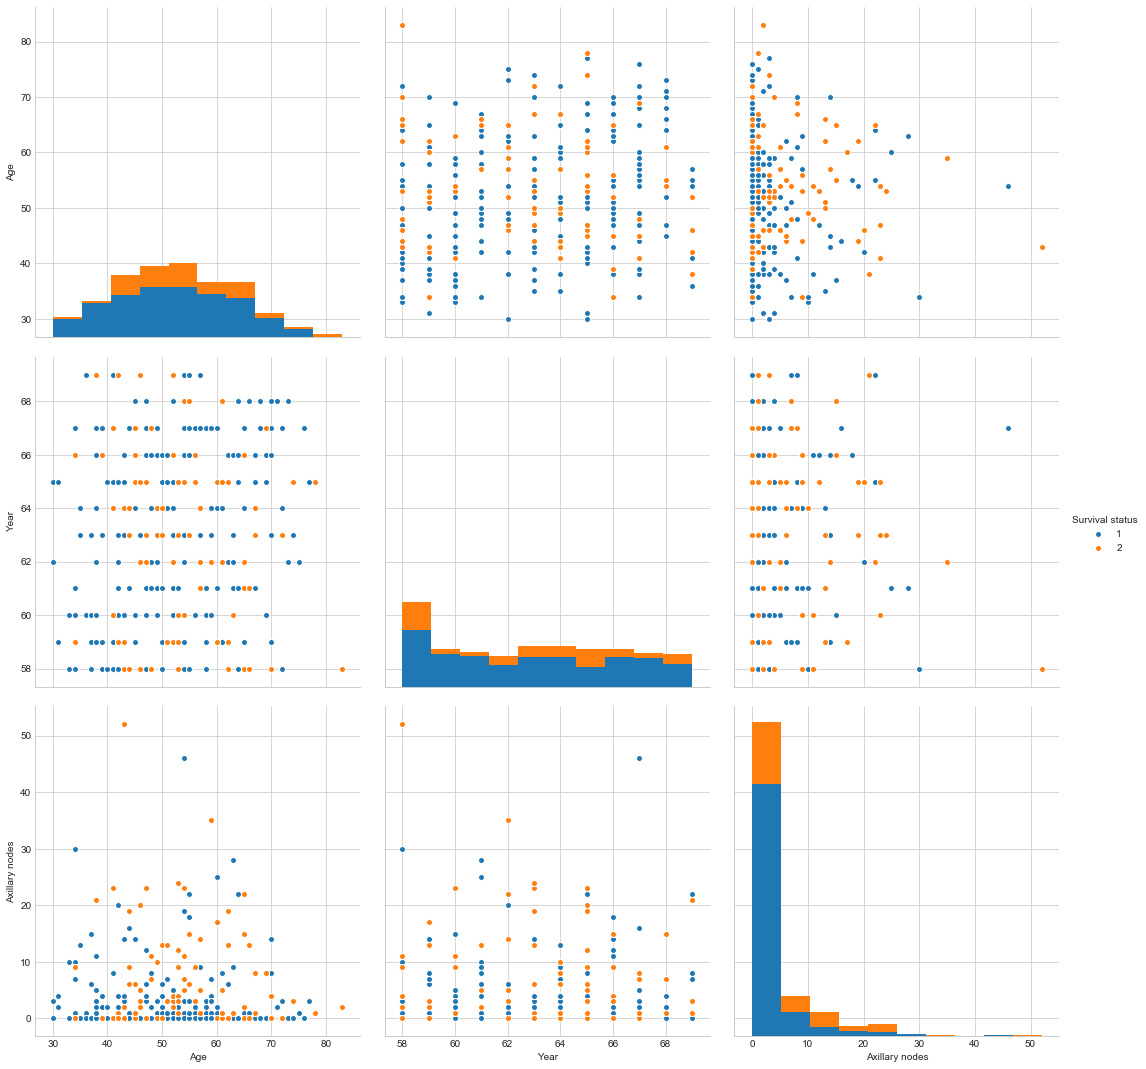

In [23]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="Survival status", vars=['Age','Year','Axillary nodes'], size=5)
plt.show()

### Observations

1. The above pair plots cannot be used to distinguish the data easily as they are **overlapping.**
2. Univariate analysis of Axillary nodes gave better result than bivariate analysis.